# ***LSTM***

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
data = pd.read_csv('merged-file0.csv')
index=0
data.columns.values[index]='comment'
comments = data['comment']

In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

data['processed_comment'] = comments.apply(preprocess_text)

In [4]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score >= 0 else 0

data['label'] = data['processed_comment'].apply(get_sentiment_label)

max_words = 5000
max_len = 100

In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_comment'])
sequences = tokenizer.texts_to_sequences(data['processed_comment'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

In [6]:
# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(64))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [7]:
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy}')

In [8]:
# import tensorflow as tf
# tf.saved_model.save(model, 'sentiment_model_pb')
# loaded_model = tf.saved_model.load('sentiment_model_pb')


In [9]:
# from google.colab import files
# !zip sentiment_model_pb.zip sentiment_model_pb
# files.download('sentiment_model_pb.zip')

In [10]:
# def predict_sentiment(text):
#     processed_text = preprocess_text(text)
#     sequence = tokenizer.texts_to_sequences([processed_text])
#     padded_sequence = pad_sequences(sequence, maxlen=max_len)
#     prediction = model.predict(padded_sequence)
#     return 'Positive' if prediction >= 0.5 else 'Negative'

# print(predict_sentiment("This is a great product!"))
# print(predict_sentiment("I am very disappointed with this item."))

# ***RNN***

In [11]:
# from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
# model.add(SimpleRNN(64, return_sequences=True))
# model.add(Dropout(0.5))
# model.add(SimpleRNN(64))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [12]:
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy}')

In [13]:
# import tensorflow as tf
# tf.saved_model.save(model, 'RNN_pb')
# loaded_model = tf.saved_model.load('RNN_pb')


# ***HYBRID***

In [14]:
# RNN
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.5))
# LSTM
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('RNN_LSTM.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [checkpoint, early_stopping]
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 417s 137ms/step - accuracy: 0.8448 - loss: 0.3845 - val_accuracy: 0.9350 - val_loss: 0.1914
Epoch 2/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 417s 129ms/step - accuracy: 0.9389 - loss: 0.1863 - val_accuracy: 0.9440 - val_loss: 0.1693
Epoch 3/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 462s 136ms/step - accuracy: 0.9467 - loss: 0.1672 - val_accuracy: 0.9496 - val_loss: 0.1540
Epoch 4/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 428s 131ms/step - accuracy: 0.9538 - loss: 0.1434 - val_accuracy: 0.9522 - val_loss: 0.1519
Epoch 5/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 440s 130ms/step - accuracy: 0.9583 - loss: 0.1323 - val_accuracy: 0.9504 - val_loss: 0.1591
Epoch 6/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 442s 130ms/step - accuracy: 0.9609 - loss: 0.1296 - val_accuracy: 0.9513 - val_loss: 0.1570
Epoch 7/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 391s 130ms/step - accuracy: 0.9640 - loss: 0.1181 - val_accuracy: 0.9533 - val_loss: 0.1538
Epoch 8/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 411s 137ms/step - ac

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

751/751 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9495 - loss: 0.1560
Test Accuracy: 0.9522124528884888


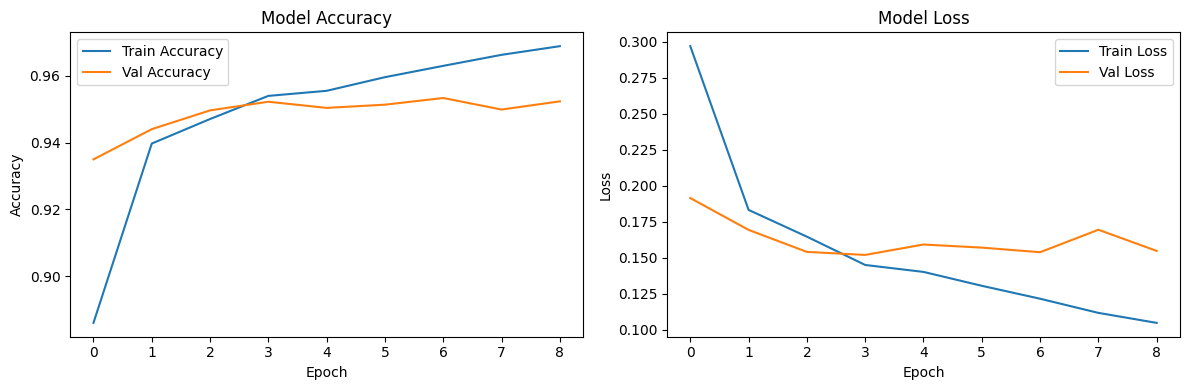

In [17]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [18]:
import tensorflow as tf
tf.saved_model.save(model, 'RNN_LSTM')
loaded_model = tf.saved_model.load('RNN_LSTM')


In [19]:
import shutil
shutil.make_archive('RNN_LSTM', 'zip', 'RNN_LSTM')
from google.colab import files
files.download('RNN_LSTM.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

751/751 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step


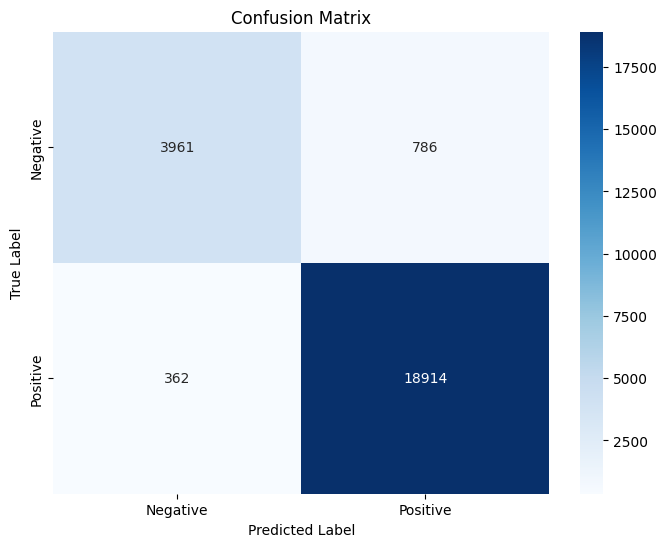

              precision    recall  f1-score   support

    Negative       0.92      0.83      0.87      4747
    Positive       0.96      0.98      0.97     19276

    accuracy                           0.95     24023
   macro avg       0.94      0.91      0.92     24023
weighted avg       0.95      0.95      0.95     24023



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate predictions for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))



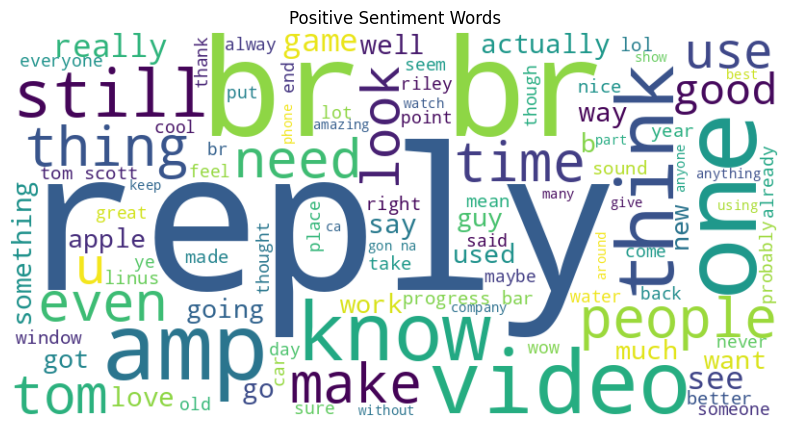

In [21]:
# Text Visualization using Word Clouds for Positive and Negative classes
def generate_word_cloud(data, label, title):
    text = ' '.join(data[data['label'] == label]['processed_comment'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Word cloud for positive sentiment
generate_word_cloud(data, label=1, title="Positive Sentiment Words")



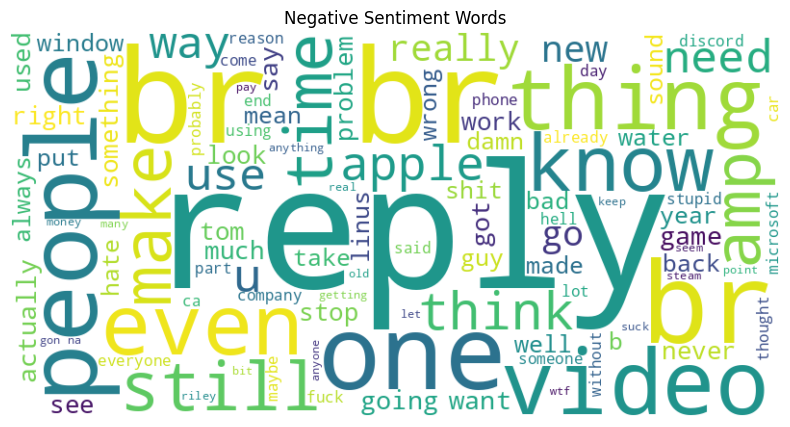

In [22]:
# Word cloud for negative sentiment
generate_word_cloud(data, label=0, title="Negative Sentiment Words")


751/751 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step


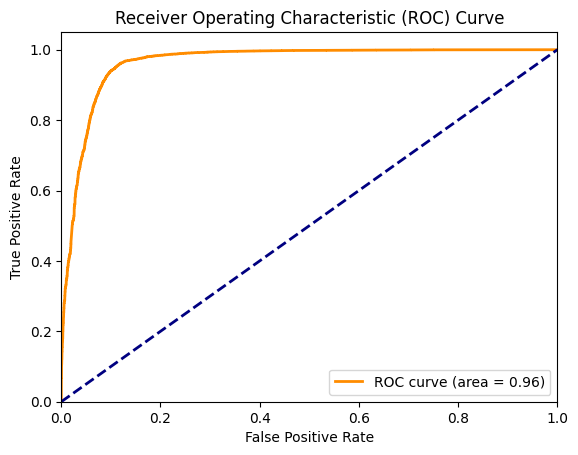

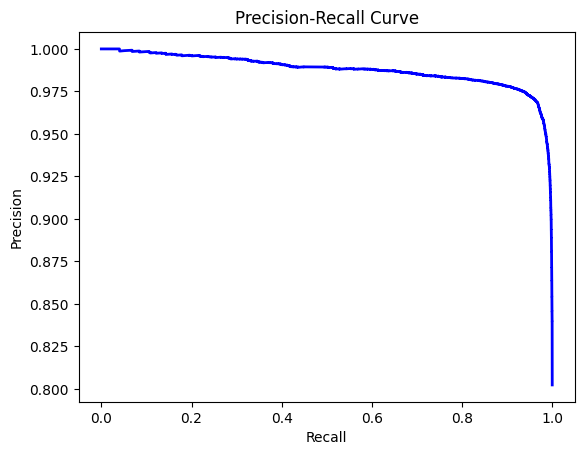

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# 1. ROC Curve
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

